# FBP demo 2 - fan beam reconstruction with DAPHNE

In [2]:
import sys
import numpy as np
sys.path.append("../") # this to be able to include all the object contained in the modules
from Misc.Utils import Unpickle,ReadImage
import matplotlib.pyplot as plt
# set the default size of all the plots 5x5 inches
plt.rcParams['figure.figsize'] = [5, 5]
from Algorithms.SinogramGenerator import SinogramGenerator
from Algorithms.FBP import FBP
from Geometry.ExperimentalSetupCT import ExperimentalSetupCT,Mode,DetectorShape
from Misc.Preview import Visualize3dImage

%matplotlib notebook

### Create a CT experimental setup

In [3]:
# create CT experimental setup
my_experimental_setup = ExperimentalSetupCT()
my_experimental_setup.mode = Mode.FANBEAM
# detector 
my_experimental_setup.pixels_per_slice_nb=100
my_experimental_setup.detector_slice_nb=10
my_experimental_setup.slice_pitch_mm=10
my_experimental_setup.detector_shape=DetectorShape.PLANAR
# sources 
my_experimental_setup.sdd_mm=750
my_experimental_setup.sad_mm=500
my_experimental_setup.fan_angle_deg=20
# number of rotation of the gantry
my_experimental_setup.gantry_angles_nb = 360
# range of the rotation
my_experimental_setup.angular_range_deg = 360
# fov size in mm 
my_experimental_setup.image_matrix_size_mm = np.array([100,100,100])
# voxel size in mm
my_experimental_setup.voxel_size_mm = np.array([1,1,10])
# compute the geometry
my_experimental_setup.Update()
print(my_experimental_setup.GetInfo())

detector_type: DetectorType.CT
mode: Mode.FANBEAM
pixels_per_slice_nb: 100
detector_slice_nb: 10
slice_pitch_mm: 10
detector_shape: DetectorShape.PLANAR
sdd_mm: 750
sad_mm: 500
fan_angle_deg: 20
gantry_angles_nb: 360
angular_range_deg: 360
image_matrix_size_mm: [100 100 100]
voxel_size_mm: [ 1  1 10]
number of projections: 360000


### Display the experimental setup

In [4]:
my_experimental_setup.Draw(use_jupyter=0,camera_pos_mm=(0,-900,140))

### Load the image used to generate the sinogram

In [5]:
%matplotlib notebook
img = np.fromfile("../Data/SheppLogan3D_100x100x100_16bit_us.raw",dtype=np.uint16).reshape((100,100,100))
img = np.transpose(img, (1,2,0))[:,:,30:50:2]


<IPython.core.display.Javascript object>


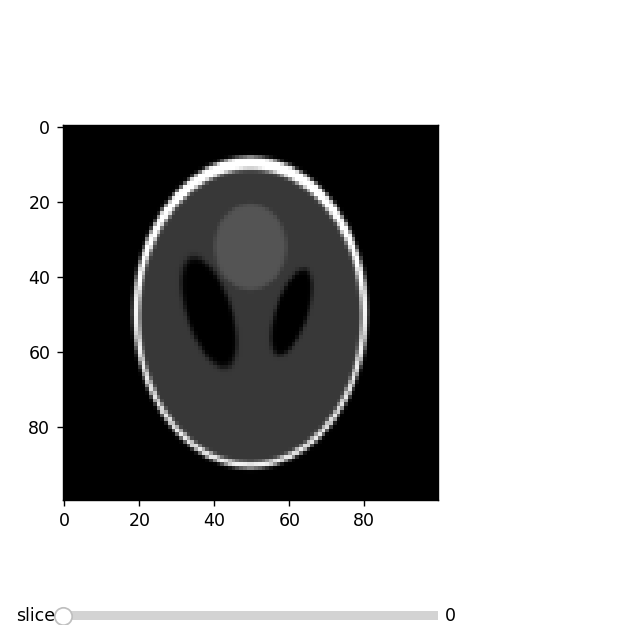

In [6]:
Visualize3dImage(img,2)

### Generate and display the sinogram

In [7]:
s=SinogramGenerator(my_experimental_setup)
sino=s.GenerateObjectSinogram(img,transponse_image=1)



<IPython.core.display.Javascript object>


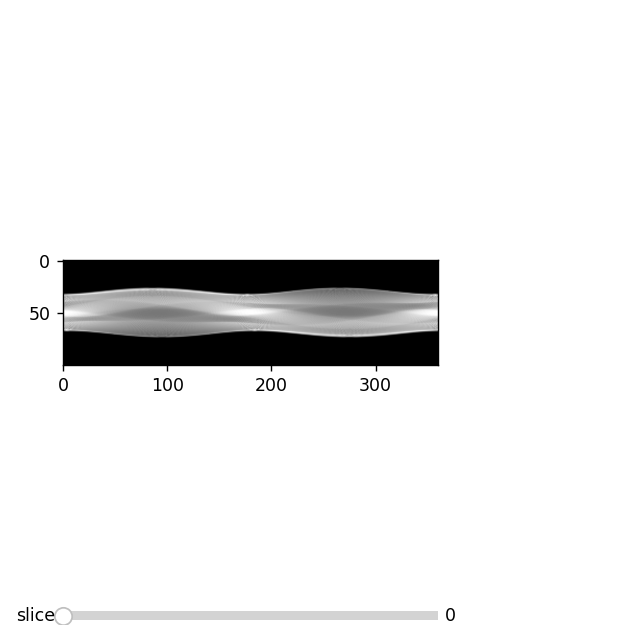

In [8]:
Visualize3dImage(sino._data,2)

### Run the FBP algorithm and display the reconstructed image

In [9]:
f=FBP()
f.sinogram=sino
# this is the interpolation for the backprojection 
# available options are : "linear","nearest","zero","slinear","quadratic","cubic"
# see for https://docs.scipy.org/doc/scipy/reference/generated/szerocipy.interpolate.interp1d.html parameter: kind
# for an explanation of the interpolation parameters  
f.interpolator='linear'
f.Reconstruct()


Generating ramp filter... 
done.

Filtering sinogram data... 
done.

Backprojecting data, 100% done...

Reconstruction done.



<IPython.core.display.Javascript object>


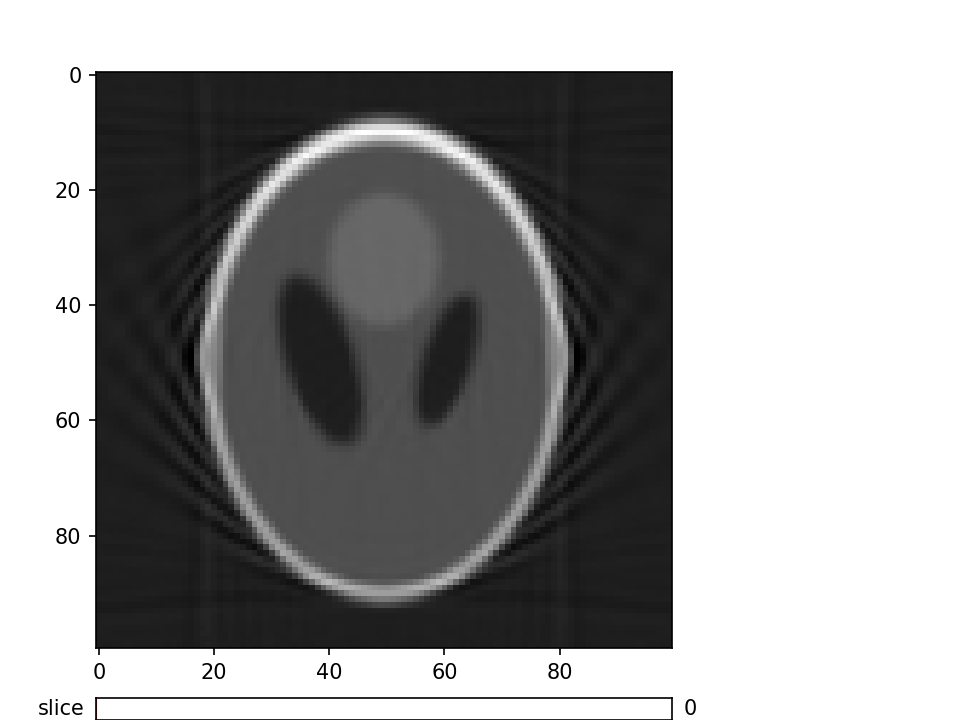

In [9]:
Visualize3dImage(np.transpose(f._image,axes=(1,0,2)))